# Week 4 — Session 2 (Hands‑On): Wrangling with pandas

This notebook covers:
- NYC Taxi wrangling pipeline
- COVID-19 time series wrangling
- Mini-challenge


## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 50)

## 1. NYC Taxi Wrangling Pipeline
Download the NYC data from the website: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page  
We will use yellow taxi data fror January, 2024

In [3]:
!pip install pandas numpy matplotlib seaborn plotly altair geopandas

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyogrio-0.11.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (5.3 kB)
  Using cached pyproj-3.7.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (31 kB)
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
Using cached pyogrio-0.11.1-cp313-cp313-macosx_12_0_arm64.whl (19.4 MB)
Using cached pyproj-3.7.2-cp313-cp313-macosx_14_0_arm64.whl (4.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [geopandas]━ 3/4 [geopandas]


In [4]:
!pip install pyarrow fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.8/683.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [fastparquet]


In [2]:
## Pay attention where you have stored the dataset and change the following path accordingly
taxi = pd.read_parquet("/Users/g48591054/Desktop/Week4_classroom/yellow_tripdata_2024-01.parquet")

print(taxi.shape)
taxi.head()


(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [3]:
taxi.to_csv("yellow_tripdata_2024-01.tsv", sep= "\t", index=False)

In [4]:
taxi = pd.read_csv("yellow_tripdata_2024-01.tsv", sep= "\t", parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])

<positron-console-cell-4>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.


In [5]:
taxi.columns[6]

'store_and_fwd_flag'

In [6]:
taxi = pd.read_csv("yellow_tripdata_2024-01.tsv", sep= "\t", parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"], dtype={"store_and_fwd_flag": str})

In [7]:
print(taxi.shape)
taxi.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [8]:
# Clean & feature engineering
taxi_clean = taxi.dropna(subset=["trip_distance"])
taxi_clean = taxi_clean[(taxi_clean.trip_distance.between(2,60)) & (taxi_clean.fare_amount.between(10,250))]
taxi_clean["pickup_hour"] = taxi_clean["tpep_pickup_datetime"].dt.hour
taxi_clean["weekday"] = taxi_clean["tpep_pickup_datetime"].dt.day_name()


In [9]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
taxi_clean["weekday"] = pd.Categorical(taxi_clean["weekday"], categories=weekday_order, ordered=True)

taxi_clean.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,weekday
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.30,2.5,0.00,0,Monday
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.9,0.0,1.0,41.50,2.5,0.00,0,Monday
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.0,0.0,1.0,64.95,0.0,1.75,0,Monday
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.0,0.0,1.0,30.40,2.5,0.00,0,Monday
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.0,0.0,1.0,36.00,2.5,0.00,0,Monday


## Seeking additional information, in this case, the Borough in New York City

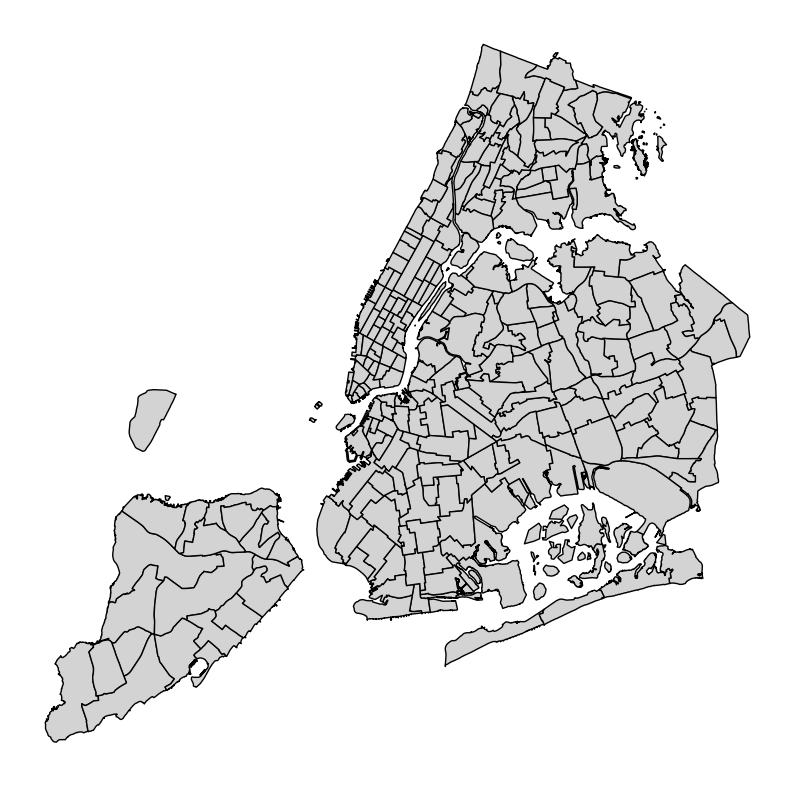

<Axes: >

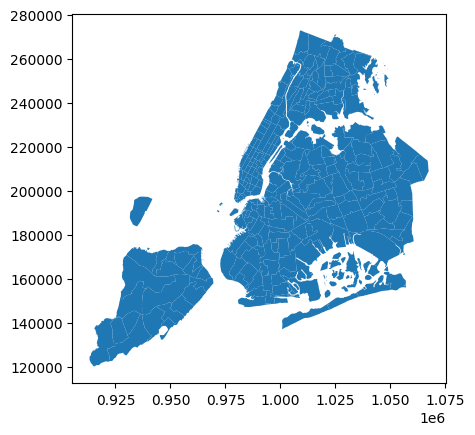

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('taxi_zones/taxi_zones.shp')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))


gdf.plot(ax=ax, color='lightgray', edgecolor='black')

plt.axis('off')
plt.show()

gdf.plot()

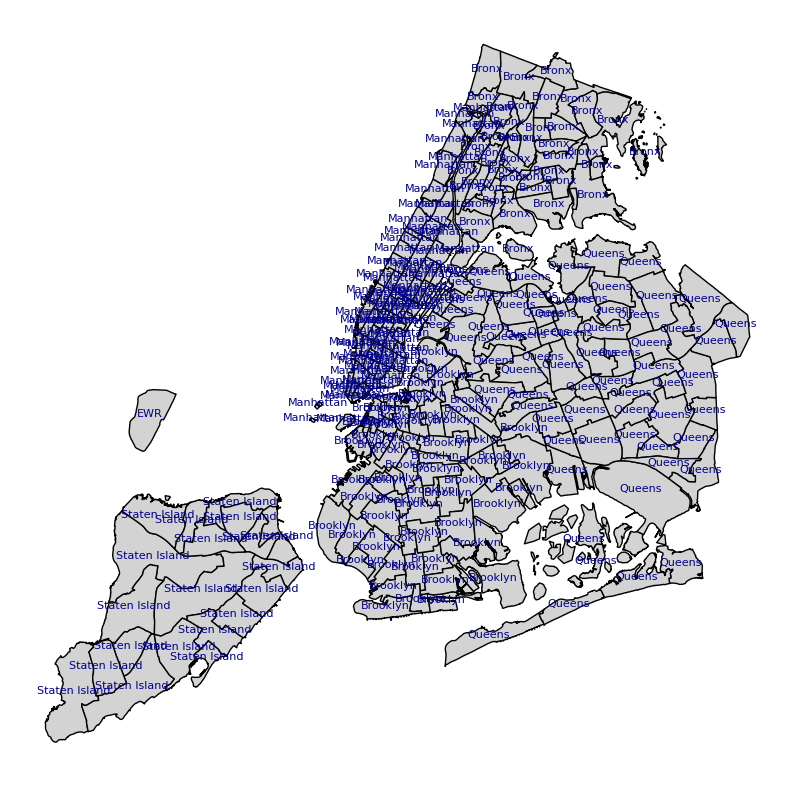

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('taxi_zones/taxi_zones.shp')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# gdf.plot()

# Replace 'label_column' with the name of the column containing your labels
for idx, row in gdf.iterrows():
    # Get the centroid of the geometry for label placement
    # For Point geometries, use row.geometry.x, row.geometry.y
    # For Polygon/LineString geometries, use row.geometry.centroid.x, row.geometry.centroid.y
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    # Add the label
    ax.annotate(text=row['borough'], xy=(x, y), horizontalalignment='center', fontsize=8, color='darkblue')

plt.axis('off')
plt.show()

In [12]:
zones = pd.read_csv("taxi_zone_lookup.csv")
zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [13]:
zones['Borough'].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn',
       'Unknown', nan], dtype=object)

In [14]:
# Join with the borough
with_boro = taxi_clean.merge(zones[["LocationID","Borough"]], left_on="PULocationID", right_on="LocationID", how="left")
with_boro.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,weekday,LocationID,Borough
0,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.30,2.5,0.00,0,Monday,236,Manhattan
1,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.9,0.0,1.0,41.50,2.5,0.00,0,Monday,148,Manhattan
2,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.0,0.0,1.0,64.95,0.0,1.75,0,Monday,138,Queens
3,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.0,0.0,1.0,30.40,2.5,0.00,0,Monday,246,Manhattan
4,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.0,0.0,1.0,36.00,2.5,0.00,0,Monday,161,Manhattan


In [15]:
with_boro = taxi_clean.merge(zones[["LocationID","Borough", "Zone"]], left_on="PULocationID", right_on="LocationID", how="left")
with_boro.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,weekday,LocationID,Borough,Zone
0,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.30,2.5,0.00,0,Monday,236,Manhattan,Upper East Side North
1,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.9,0.0,1.0,41.50,2.5,0.00,0,Monday,148,Manhattan,Lower East Side
2,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.0,0.0,1.0,64.95,0.0,1.75,0,Monday,138,Queens,LaGuardia Airport
3,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.0,0.0,1.0,30.40,2.5,0.00,0,Monday,246,Manhattan,West Chelsea/Hudson Yards
4,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.0,0.0,1.0,36.00,2.5,0.00,0,Monday,161,Manhattan,Midtown Center


**filter data based on Borough information**

In [16]:
nyc_boroughs = ['Queens', 'Manhattan', 'Brooklyn', 'Bronx']


with_boro = with_boro[with_boro['Borough'].isin(nyc_boroughs)]

print(with_boro.shape)
with_boro.head()



(1220591, 24)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,weekday,LocationID,Borough,Zone
0,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.30,2.5,0.00,0,Monday,236,Manhattan,Upper East Side North
1,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.9,0.0,1.0,41.50,2.5,0.00,0,Monday,148,Manhattan,Lower East Side
2,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.0,0.0,1.0,64.95,0.0,1.75,0,Monday,138,Queens,LaGuardia Airport
3,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.0,0.0,1.0,30.40,2.5,0.00,0,Monday,246,Manhattan,West Chelsea/Hudson Yards
4,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.0,0.0,1.0,36.00,2.5,0.00,0,Monday,161,Manhattan,Midtown Center


## GroupBy function

In [17]:
# Group & summarize
by_hour = with_boro.groupby("pickup_hour").agg(trips=("trip_distance","count")).reset_index()
by_weekday = with_boro.groupby("weekday").size().rename("trips")
by_hour.head(), by_weekday

<positron-console-cell-17>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


(   pickup_hour  trips
 0            0  39664
 1            1  25160
 2            2  17201
 3            3  11860
 4            4   9151,
 weekday
 Monday       177564
 Tuesday      184335
 Wednesday    199209
 Thursday     177140
 Friday       166004
 Saturday     169894
 Sunday       146445
 Name: trips, dtype: int64)

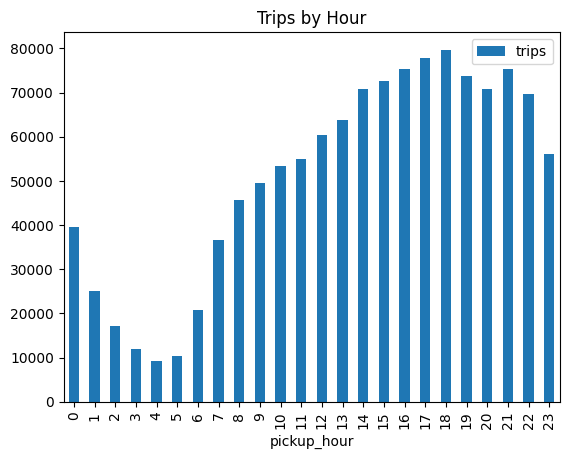

In [18]:
# Visualize
by_hour.plot(x="pickup_hour", y="trips", kind="bar", title="Trips by Hour")
plt.show()


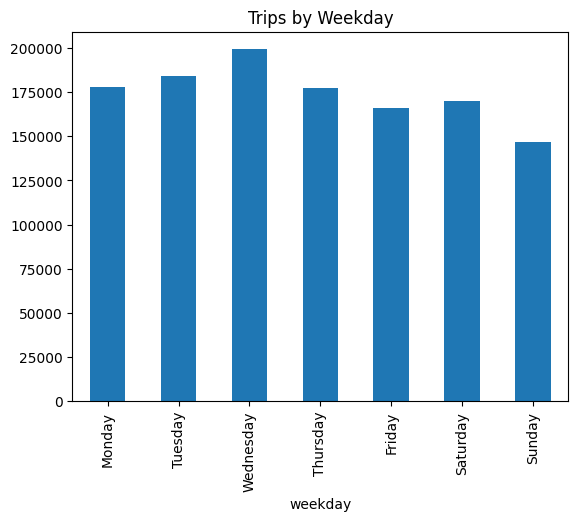

In [19]:
by_weekday.plot(kind="bar", title="Trips by Weekday")
plt.show()

### Heatmap of mean trip distance by weekday × hour

<positron-console-cell-20>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


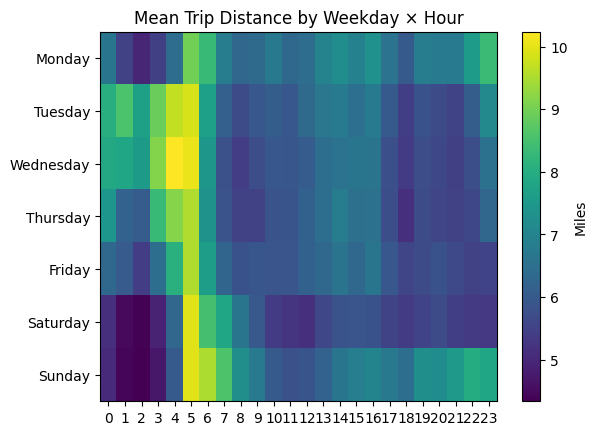

In [20]:
pivot_md = with_boro.pivot_table(index="weekday", columns="pickup_hour", values="trip_distance", aggfunc="mean")
plt.imshow(pivot_md.values, aspect="auto")
plt.xticks(range(pivot_md.shape[1]), pivot_md.columns)
plt.yticks(range(pivot_md.shape[0]), pivot_md.index)
plt.colorbar(label="Miles")
plt.title("Mean Trip Distance by Weekday × Hour")
plt.show()

**One step further with population**

In [21]:
pop = pd.read_csv("nyc_population_2024.csv")
pop.head()

,Borough,pop
0,Bronx,1468000
1,Brooklyn,2660000
2,Manhattan,1642000
3,Queens,2257000
4,Staten Island,488000


In [22]:
with_boro_pop = pd.merge(with_boro, pop, on='Borough', how='left')
with_boro_pop.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,weekday,LocationID,Borough,Zone,pop
0,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.30,2.5,0.00,0,Monday,236,Manhattan,Upper East Side North,1642000
1,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.9,0.0,1.0,41.50,2.5,0.00,0,Monday,148,Manhattan,Lower East Side,1642000
2,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.0,0.0,1.0,64.95,0.0,1.75,0,Monday,138,Queens,LaGuardia Airport,2257000
3,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.0,0.0,1.0,30.40,2.5,0.00,0,Monday,246,Manhattan,West Chelsea/Hudson Yards,1642000
4,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.0,0.0,1.0,36.00,2.5,0.00,0,Monday,161,Manhattan,Midtown Center,1642000


In [23]:
by_hour = (
    with_boro_pop.groupby(["pickup_hour", "Borough"], as_index=False)
    .agg({"passenger_count": "sum", "pop": "first"})  # pop is constant per borough
)

# Normalize by borough population
by_hour["passenger_per_capita"] = by_hour["passenger_count"] / by_hour["pop"]

print(by_hour.head())

   pickup_hour    Borough  passenger_count      pop  passenger_per_capita
0            0      Bronx             18.0  1468000              0.000012
1            0   Brooklyn            294.0  2660000              0.000111
2            0  Manhattan          38288.0  1642000              0.023318
3            0     Queens          11619.0  2257000              0.005148
4            1      Bronx             13.0  1468000              0.000009


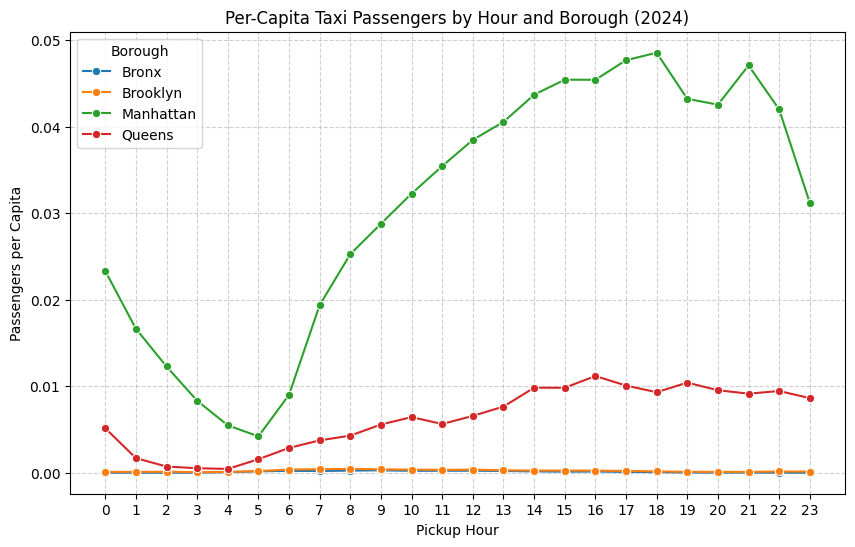

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(
    data=by_hour,
    x="pickup_hour",
    y="passenger_per_capita",
    hue="Borough",
    marker="o"
)

plt.title("Per-Capita Taxi Passengers by Hour and Borough (2024)")
plt.xlabel("Pickup Hour")
plt.ylabel("Passengers per Capita")
plt.xticks(range(0,24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [25]:
weekday_result = (
    with_boro_pop.groupby(["weekday", "Borough"], as_index=False)
    .agg({"passenger_count": "sum", "pop": "first"})
)

# Normalize by borough population
weekday_result["passenger_per_capita"] = weekday_result["passenger_count"] / weekday_result["pop"]

print(weekday_result.head())

   weekday    Borough  passenger_count      pop  passenger_per_capita
0   Monday      Bronx            575.0  1468000              0.000392
1   Monday   Brooklyn           2459.0  2660000              0.000924
2   Monday  Manhattan         166035.0  1642000              0.101118
3   Monday     Queens          60921.0  2257000              0.026992
4  Tuesday      Bronx            748.0  1468000              0.000510


<positron-console-cell-25>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


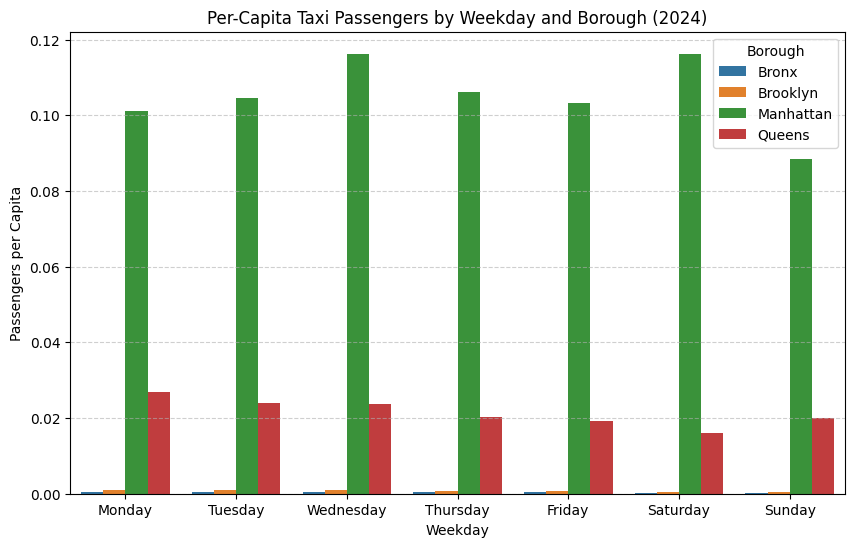

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=weekday_result,
    x="weekday",
    y="passenger_per_capita",
    hue="Borough"
)

plt.title("Per-Capita Taxi Passengers by Weekday and Borough (2024)")
plt.xlabel("Weekday")
plt.ylabel("Passengers per Capita")
plt.legend(title="Borough")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


<positron-console-cell-27>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


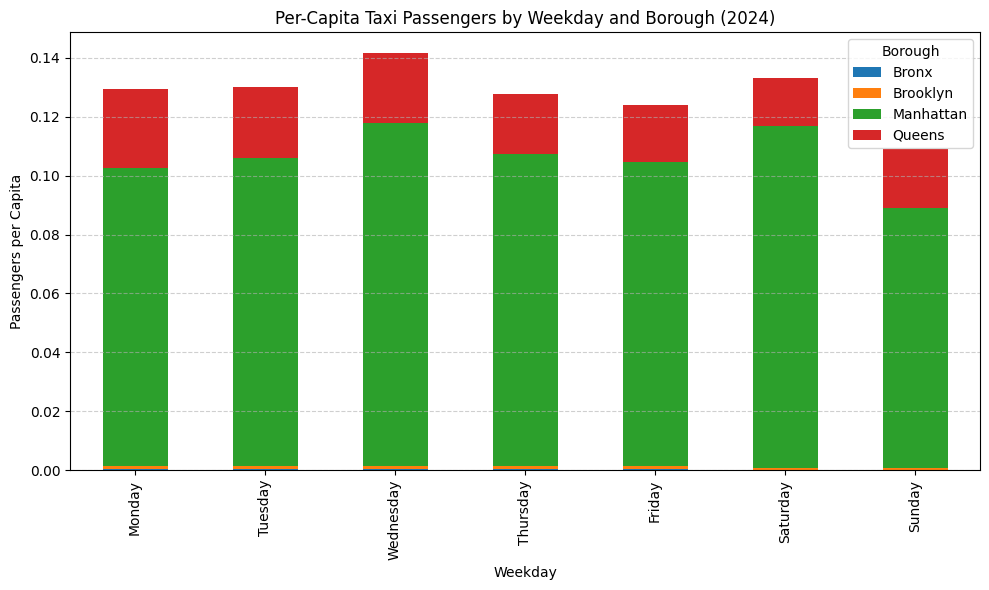

In [27]:
import matplotlib.pyplot as plt

# Pivot so Boroughs become columns
pivot_df = weekday_result.pivot_table(
    index="weekday",
    columns="Borough",
    values="passenger_per_capita",
    aggfunc="sum"  # in case multiple entries exist
).fillna(0)

# Plot stacked barplot
pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Per-Capita Taxi Passengers by Weekday and Borough (2024)")
plt.xlabel("Weekday")
plt.ylabel("Passengers per Capita")
plt.legend(title="Borough")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure weekday order
# order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# weekday_result["weekday"] = pd.Categorical(
#     weekday_result["weekday"], categories=order, ordered=True
# )

# Pivot to have boroughs as rows, weekdays as columns
heatmap_data = weekday_result.pivot(index="Borough", columns="weekday", values="passenger_per_capita")


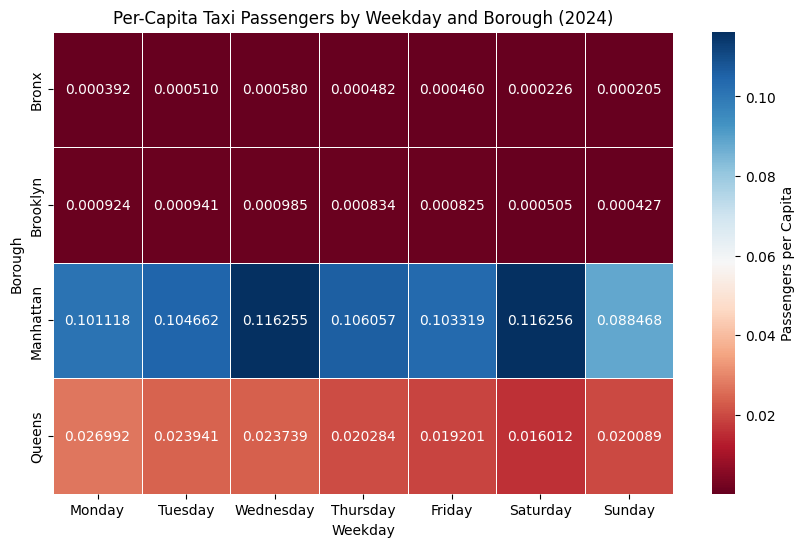

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".6f", cmap="RdBu", linewidths=0.5, cbar_kws={'label': 'Passengers per Capita'}
)

plt.title("Per-Capita Taxi Passengers by Weekday and Borough (2024)")
plt.xlabel("Weekday")
plt.ylabel("Borough")
plt.show()


In [30]:
# Pivot to create heatmap table
heatmap_hourly = by_hour.pivot(
    index="Borough", 
    columns="pickup_hour", 
    values="passenger_per_capita"
)


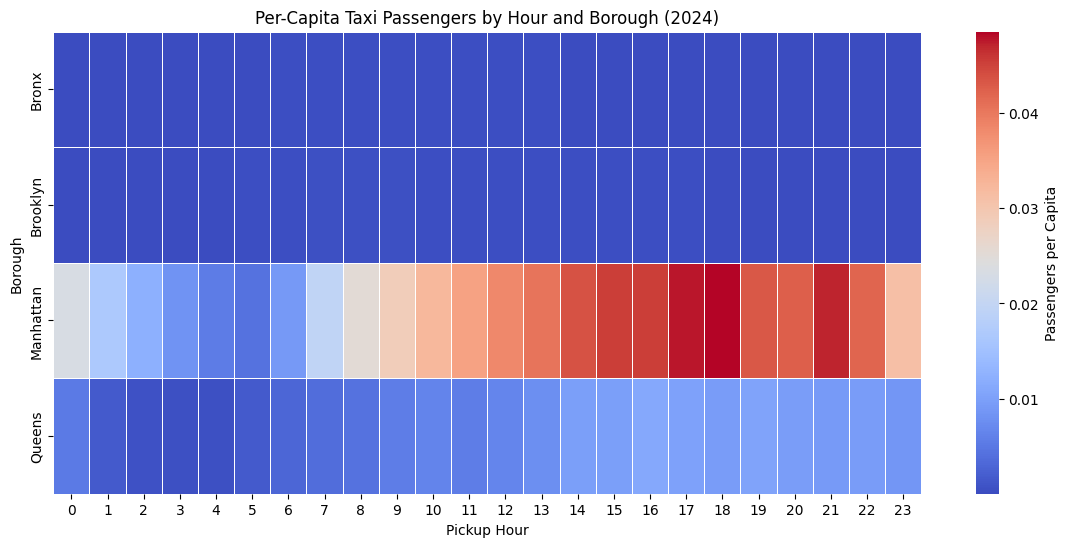

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_hourly,
    annot=False, cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Passengers per Capita'}
)

plt.title("Per-Capita Taxi Passengers by Hour and Borough (2024)")
plt.xlabel("Pickup Hour")
plt.ylabel("Borough")
plt.xticks(rotation=0)
plt.show()


Color palettes: Seaborn: https://seaborn.pydata.org/tutorial/color_palettes.html  
matlibplot: https://matplotlib.org/stable/users/explain/colors/colormaps.html


## 2. COVID‑19 Time Series Wrangling

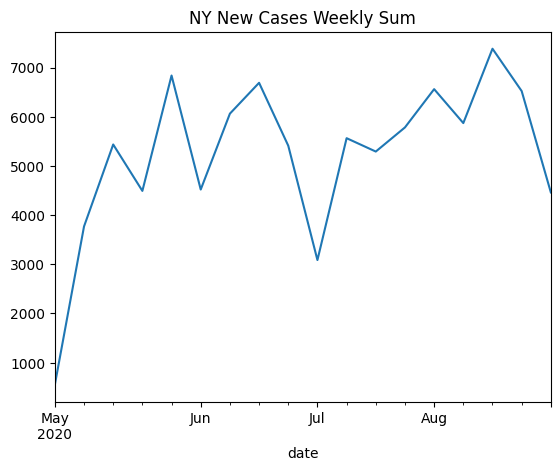

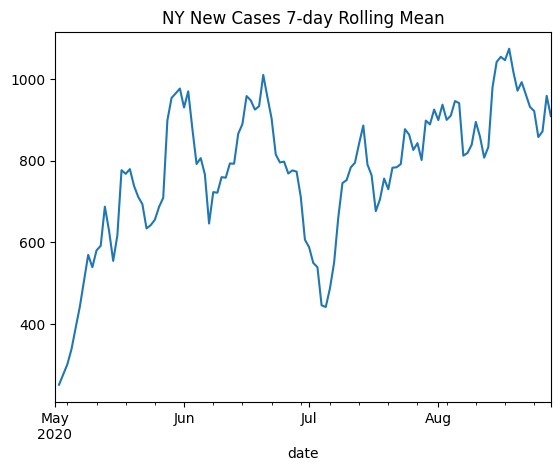

In [32]:
covid = pd.read_csv("covid_daily.csv", parse_dates=["date"])
ny = covid[covid.state=="NY"].set_index("date").sort_index()
ny["new_cases"] = ny["cases"].diff()
weekly = ny["new_cases"].resample("W-SUN").sum()
rolling = ny["new_cases"].rolling(7, min_periods=1).mean()
weekly.plot(title="NY New Cases Weekly Sum")
plt.show()
rolling.plot(title="NY New Cases 7-day Rolling Mean")
plt.show()

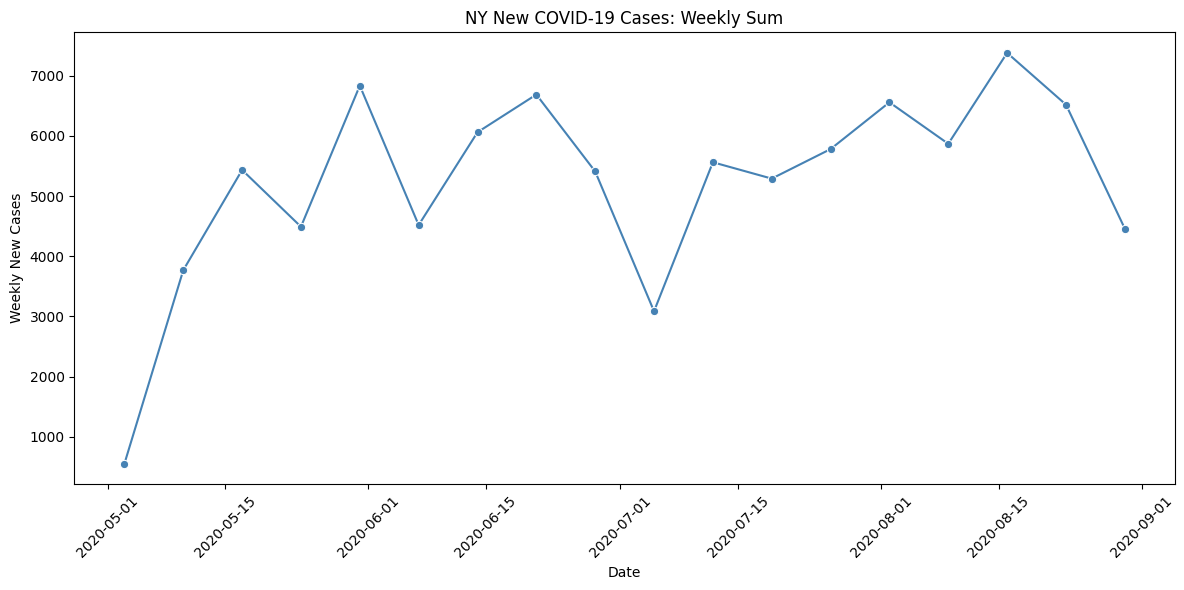

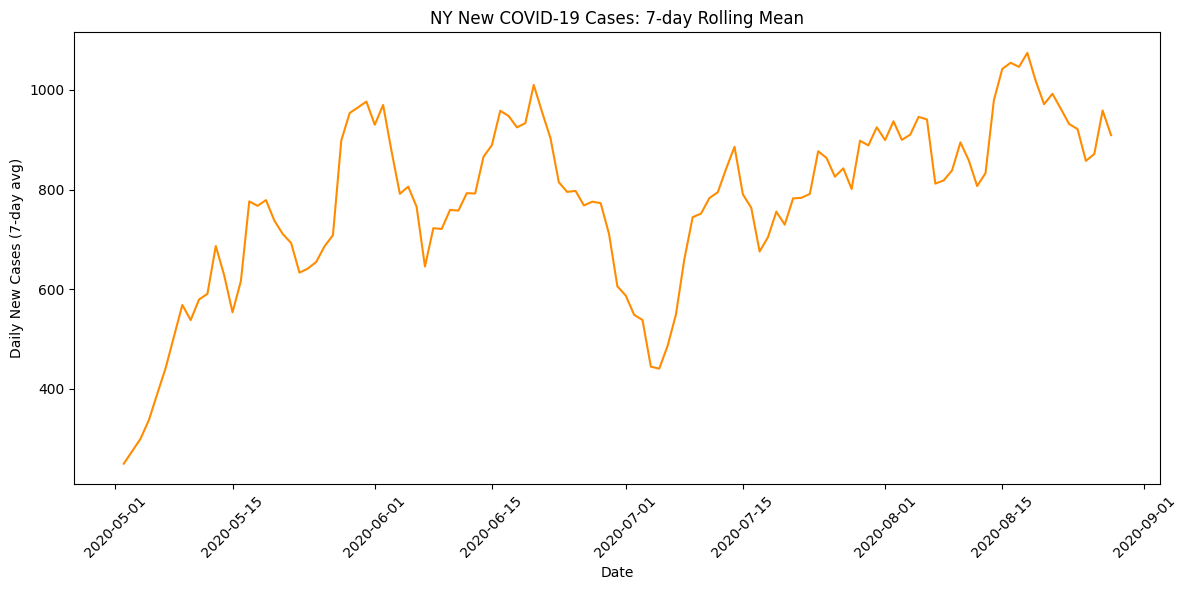

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1) Load and filter NY data ---
covid = pd.read_csv("covid_daily.csv", parse_dates=["date"])
ny = (covid[covid["state"] == "NY"]
      .set_index("date")
      .sort_index())

# Daily new cases from cumulative
ny["new_cases"] = ny["cases"].diff()

# --- 2) Compute weekly sum ---
weekly = ny["new_cases"].resample("W-SUN").sum().reset_index()
weekly.columns = ["date", "weekly_cases"]

# --- 3) Compute 7-day rolling mean ---
rolling = ny["new_cases"].rolling(7, min_periods=1).mean().reset_index()
rolling.columns = ["date", "rolling_mean"]

# --- 4) Plot weekly sum ---
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly, x="date", y="weekly_cases", marker="o", color="steelblue")
plt.title("NY New COVID-19 Cases: Weekly Sum")
plt.xlabel("Date")
plt.ylabel("Weekly New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 5) Plot rolling mean ---
plt.figure(figsize=(12,6))
sns.lineplot(data=rolling, x="date", y="rolling_mean", color="darkorange")
plt.title("NY New COVID-19 Cases: 7-day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Daily New Cases (7-day avg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Mini‑Challenge

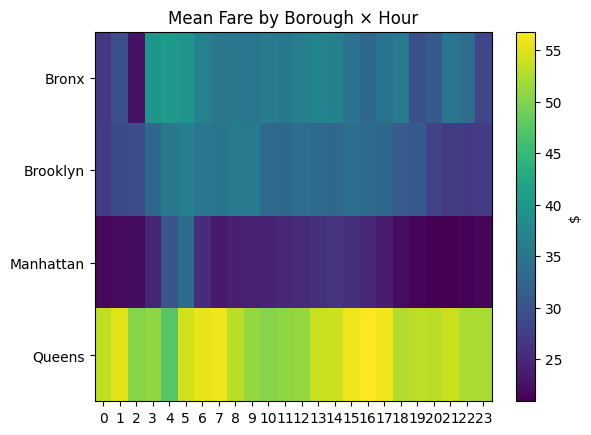

In [34]:
# Mean fare by borough × hour
mean_fare = with_boro.groupby(["Borough","pickup_hour"])["fare_amount"].mean().reset_index()
pivot_fare = mean_fare.pivot(index="Borough", columns="pickup_hour", values="fare_amount")
plt.imshow(pivot_fare.values, aspect="auto")
plt.xticks(range(pivot_fare.shape[1]), pivot_fare.columns)
plt.yticks(range(pivot_fare.shape[0]), pivot_fare.index)
plt.colorbar(label="$")
plt.title("Mean Fare by Borough × Hour")
plt.show()

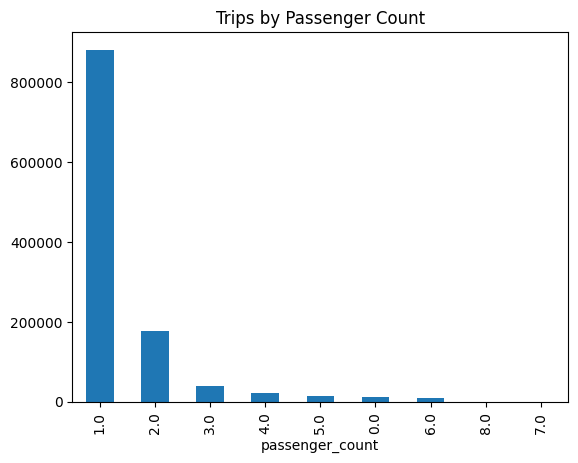

In [35]:
# Bonus: trips by passenger count
by_passengers = with_boro.groupby("passenger_count").size().rename("trips").sort_values(ascending=False)
by_passengers.plot(kind="bar", title="Trips by Passenger Count")
plt.show()

In [36]:
## if you want to correctly display interactive graphs using Plotly, add the following lines for the visualization
import plotly.io as pio 
pio.renderers.default = 'plotly_mimetype+notebook_connected'

In [37]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()